## Importing Libraries

In [2]:
import cv2
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf


## Define training set and testing set

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Normalising the image and tests

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Creating a model

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

## Compiling the model

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Saving the model

In [7]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2631 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1082 - accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0745 - accuracy: 0.9765


In [8]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


## Loading the above model
('handwritten.model')

In [9]:
model = tf.keras.models.load_model('handwritten.model')

## Checking the model

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 872us/step - loss: 0.0959 - accuracy: 0.9712


In [11]:
print(loss)
print(accuracy)

0.0959039032459259
0.9711999893188477


## Prediction Algorithm

In [15]:
def digt_prediction(img):
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"The digit is probably a {np.argmax(prediction)}.")
    plt.imshow(img[0], cmap=matplotlib.cm.binary)
    plt.show()

## Checking images from file

1/1 [==============================] - 0s 19ms/step
The digit is probably a 5.


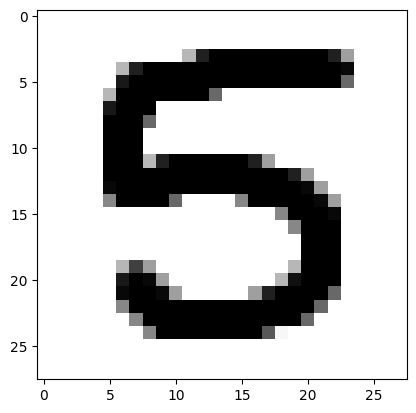

1/1 [==============================] - 0s 46ms/step
The digit is probably a 3.


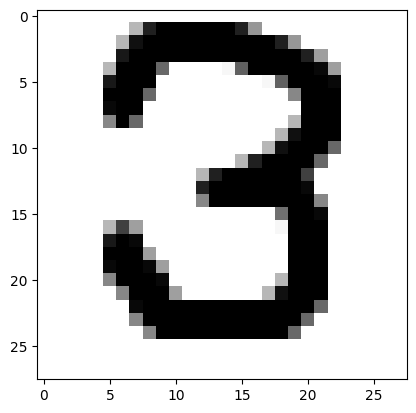

In [16]:
image_num = 1
while os.path.exists(f"images\digit{image_num}.png"):
    try:
        img = cv2.imread(f"images\digit{image_num}.png")[:,:,0]
        digt_prediction(img)

    except:
        print("error!")
    finally:
        image_num += 1
